In [70]:
import pandas as pd




In [71]:
data= pd.read_csv('Cars93.csv')
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [72]:
data.head(5)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [73]:
data.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [103]:
keys=['EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Passengers']
y='Price'

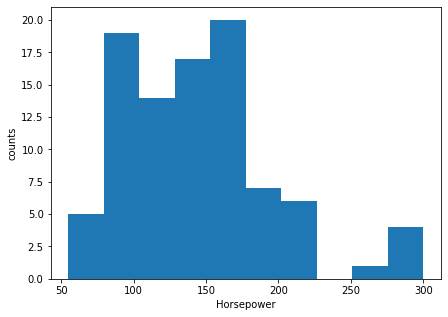

In [104]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
plt.hist(data['Horsepower'])
plt.xlabel('Horsepower')
plt.ylabel('counts')
plt.show()

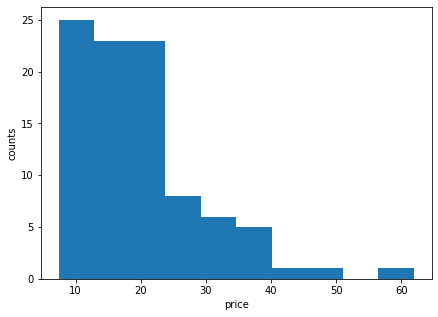

In [105]:
fig = plt.figure(figsize=(7,5))
plt.hist(data['Price'])
plt.xlabel('price')
plt.ylabel('counts')
plt.show()

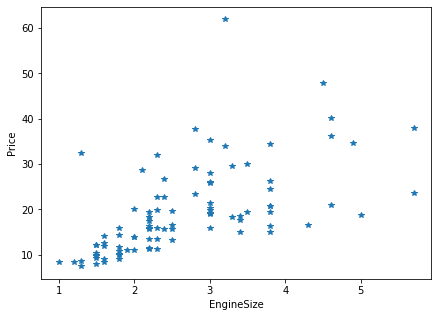

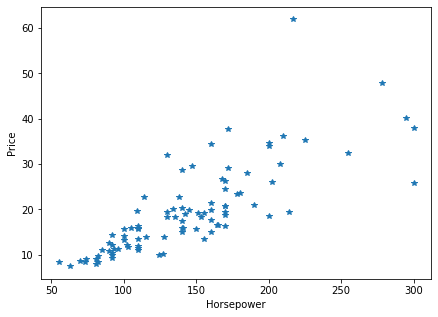

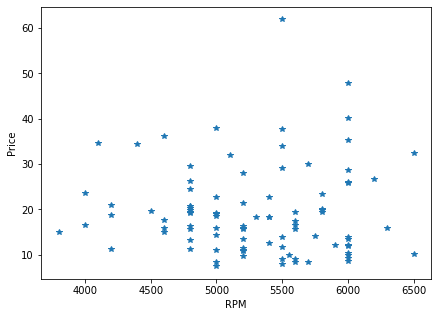

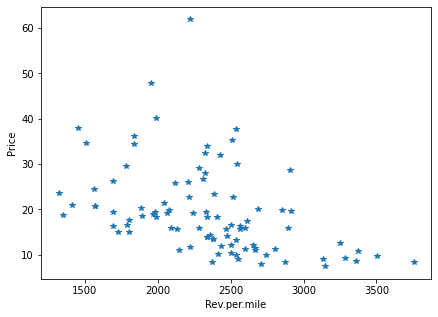

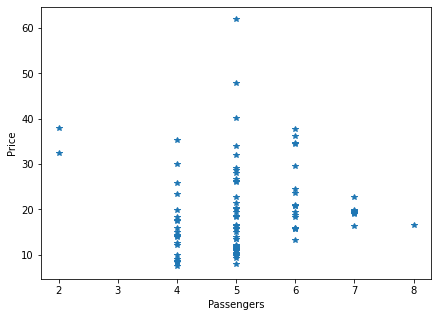

In [106]:
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k],data[y],'*')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

In [107]:
#Mi hipótesis es que a mayor número de caballos de fuerza el precio incrementa
import numpy as np
Y=np.array(data[y])
Y
np.unique(Y,return_counts=True)


(array([ 7.4,  8. ,  8.3,  8.4,  8.6,  9. ,  9.1,  9.2,  9.8, 10. , 10.1,
        10.3, 10.9, 11.1, 11.3, 11.4, 11.6, 11.8, 12.1, 12.2, 12.5, 13.3,
        13.4, 13.5, 13.9, 14. , 14.1, 14.4, 14.9, 15.1, 15.6, 15.7, 15.8,
        15.9, 16.3, 16.5, 16.6, 17.5, 17.7, 18.2, 18.4, 18.5, 18.8, 19. ,
        19.1, 19.3, 19.5, 19.7, 19.8, 19.9, 20. , 20.2, 20.7, 20.8, 20.9,
        21.5, 22.7, 23.3, 23.7, 24.4, 25.8, 26.1, 26.3, 26.7, 28. , 28.7,
        29.1, 29.5, 30. , 31.9, 32.5, 33.9, 34.3, 34.7, 35.2, 36.1, 37.7,
        38. , 40.1, 47.9, 61.9]),
 array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [108]:
Y[Y<30] = 0
Y[Y>=30] = 1
np.unique(Y,return_counts=True)

(array([0., 1.]), array([80, 13]))

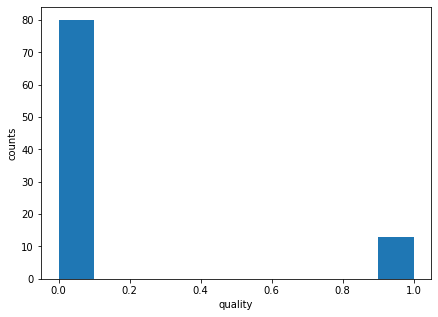

In [109]:
fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.ylabel('counts')
plt.xlabel('quality')
plt.show()

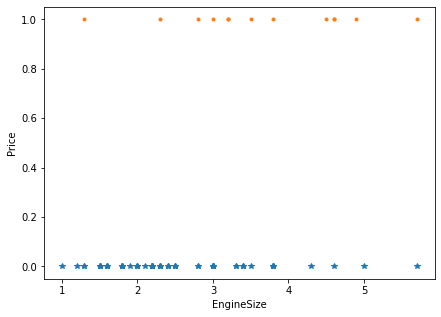

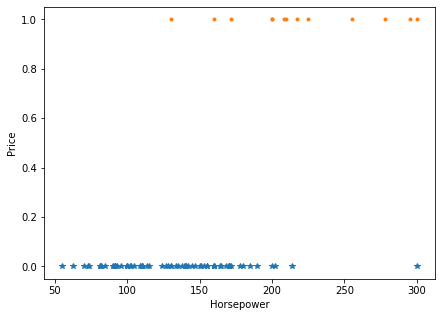

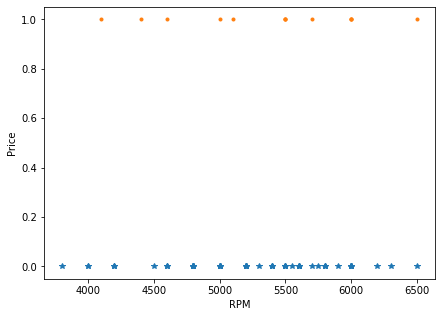

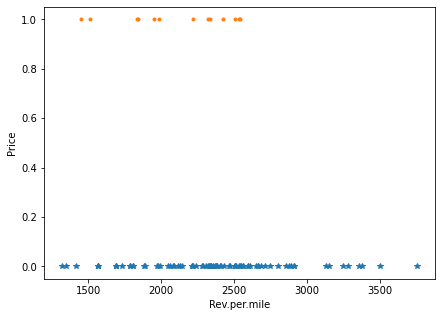

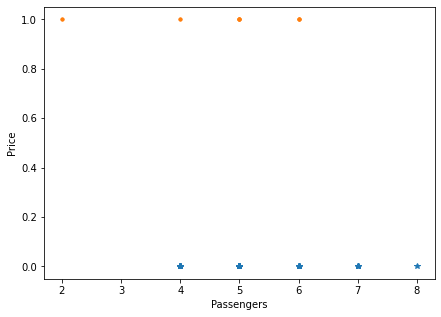

In [110]:
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k][Y==0],Y[Y==0],'*')
  plt.plot(data[k][Y==1],Y[Y==1],'.')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

In [111]:
!pip install corner

In [112]:
import corner



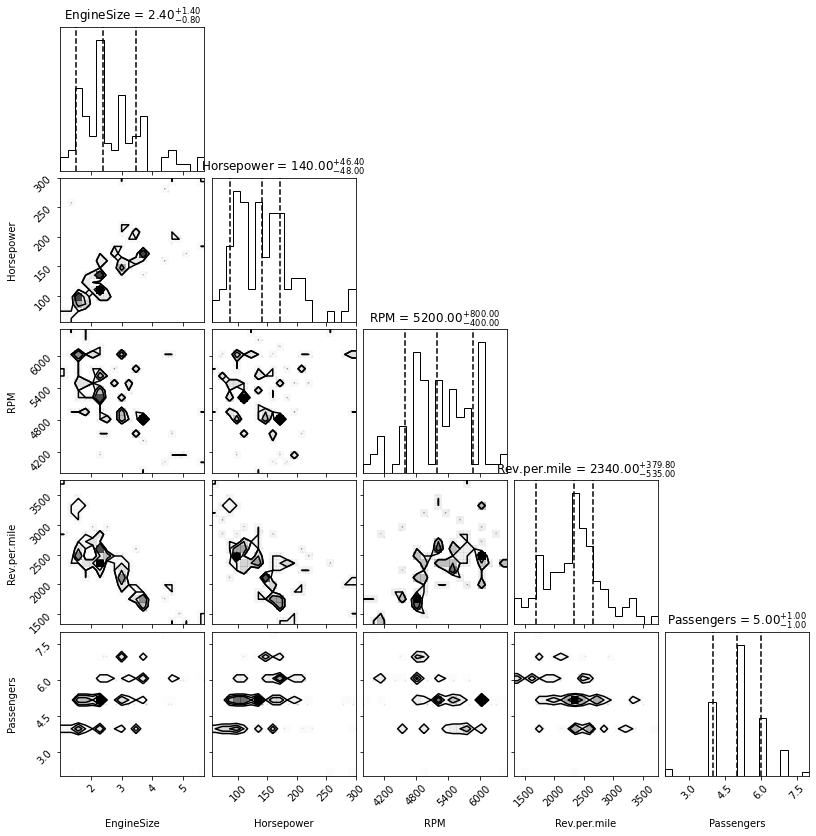

In [113]:
figure = corner.corner(data[keys], labels=keys,
                       quantiles=[0.1, 0.5, 0.8],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [114]:
from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(data[keys])

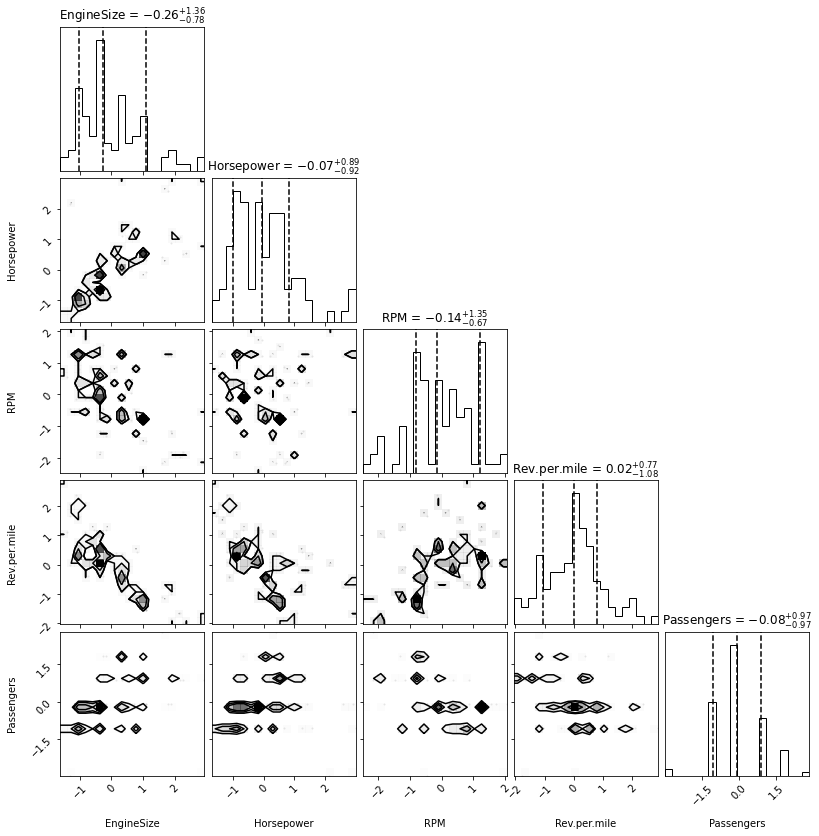

In [115]:
figure = corner.corner(data_scaled, labels=keys,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

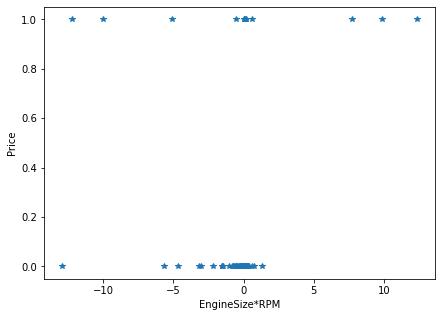

In [116]:
fig = plt.figure(figsize=(7,5))
plt.plot( (0.9*data_scaled[:,0]/0.9*data_scaled[:,1]) * (0.9*data_scaled[:,2]/0.9*data_scaled[:,0]) ,Y,'*')
plt.xlabel('EngineSize*RPM')
plt.ylabel(y)
plt.show()

In [117]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=100, max_depth=10)

X_train, X_test, Y_train, Y_test = train_test_split(np.array(data[keys]),Y)

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

In [119]:
acc = sum(Y_pred == Y_test)/len(Y_test)
acc

0.9583333333333334

In [120]:
importances = model.feature_importances_
importances

array([0.19395573, 0.44150622, 0.15176604, 0.15412128, 0.05865073])

In [121]:
ii = np.argsort(importances)[::-1]
np.array(keys)[ii]

array(['Horsepower', 'EngineSize', 'Rev.per.mile', 'RPM', 'Passengers'],
      dtype='<U12')